In [1]:
# Manipulations standard
import geopandas as gpd
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# Pour la basemap
import contextily as cx
# Autres
import os
# Potentiel solaire package
from potentiel_solaire.constants import DATA_FOLDER

# Etape 1: Ouverture des datasets

## Dataset : départements

/var/folders/k7/bzt5hyld3w52dgp85hycld2h0000gn/T/ipykernel_14861/2162312035.py:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  dpts[dpts.code == "93"].plot(column="nom",legend=True, categorical = True, ax = ax, color="green",alpha=0.5)
/var/folders/k7/bzt5hyld3w52dgp85hycld2h0000gn/T/ipykernel_14861/2162312035.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


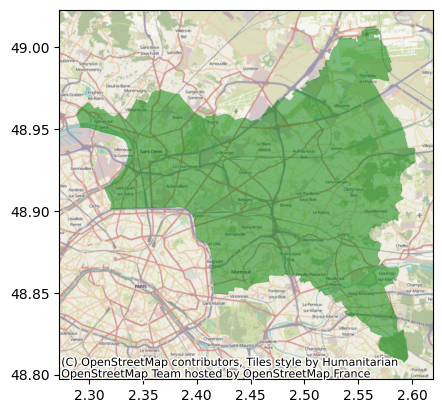

In [2]:
dpts = gpd.read_file(DATA_FOLDER / "contour-des-departements.geojson").to_crs(4326)
ShapeNT = dpts[dpts.code == "93"].geometry
fig, ax = plt.subplots()
dpts[dpts.code == "93"].plot(column="nom",legend=True, categorical = True, ax = ax, color="green",alpha=0.5)
cx.add_basemap(ax, crs=dpts.crs)
fig.show()

## Dataset : annuaire éducation / écoles

In [3]:
# Takes 58s on my laptop
annuaire = gpd.read_file(DATA_FOLDER / 'fr-en-annuaire-education.geojson')
print(len(annuaire),"items")
annuaire = annuaire[annuaire.code_postal.str.startswith("93")]
print(len(annuaire),"objets dans le 93")
annuaire = annuaire.to_crs(4326)
annuaire.head(3)

69645 items
1432 objets dans le 93


identifiant_de_l_etablissement  \
2524                       0930863H   
2544                       0932260B   
2572                       0930929E   

                                 nom_etablissement type_etablissement  \
2524     Maison d'éducation de la Légion d'Honneur              Lycée   
2544             Lycée polyvalent Georges Brassens              Lycée   
2572  Lycée professionnel privé Jeanne la Lorraine              Lycée   

     statut_public_prive                     adresse_1 adresse_2 adresse_3  \
2524              Public  5 rue de la Légion d'Honneur      None      None   
2544              Public         Rue des Bancs Publics      None      None   
2572               Privé           3 boulevard du Nord      None      None   

     code_postal code_commune  nom_commune  ... code_type_contrat_prive  pial  \
2524       93206        93066  Saint-Denis  ...                      99  None   
2544       93420        93078   Villepinte  ...                      99  None   
2572       93340        93062    Le Raincy  ...                      30  None   

     etablissement_mere  type_rattachement_etablissement_mere  \
2524               None                                  None   
2544               None                                  None   
2572               None                                  None   

      code_circonscription code_zone_animation_pedagogique  \
2524                  None                            None   
2544                  None                            None   
2572                  None                            None   

     libelle_zone_animation_pedagogique code_bassin_formation  \
2524                               None                 24931   
2544                               None                 24932   
2572                               None                 24934   

        libelle_bassin_formation                  geometry  
2524  93 BASSIN 1 (DIST. 1 ET 2)  POINT (2.35846 48.93495)  
2544  93 BASSIN 2 (DIST. 3 ET 4)  POINT (2.53459 48.95659)  
2572  93 BASSIN 4 (DIST. 7 ET 8)  POINT (2.51348 48.90167)  

[3 rows x 73 columns]

## Dataset : BD TOPO

In [4]:
import fiona

Vérifions quelles sont les layers de dispo dans le gpkg

In [5]:
GPKG = DATA_FOLDER / "BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/1_DONNEES_LIVRAISON_2024-12-00134/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg"
layers = fiona.listlayers(GPKG)
print(" ".join(layers))

troncon_de_route route_numerotee_ou_nommee itineraire_autre troncon_de_voie_ferree equipement_de_transport piste_d_aerodrome aerodrome point_de_repere non_communication point_du_reseau voie_ferree_nommee toponymie_transport batiment cimetiere construction_lineaire construction_ponctuelle construction_surfacique reservoir ligne_orographique pylone terrain_de_sport toponymie_bati cours_d_eau troncon_hydrographique bassin_versant_topographique plan_d_eau surface_hydrographique noeud_hydrographique detail_hydrographique toponymie_hydrographie zone_d_habitation lieu_dit_non_habite detail_orographique toponymie_lieux_nommes canalisation ligne_electrique poste_de_transformation erp zone_d_activite_ou_d_interet toponymie_services_et_activites voie_nommee parc_ou_reserve foret_publique toponymie_zones_reglementees haie zone_de_vegetation arrondissement arrondissement_municipal commune epci collectivite_territoriale departement region adresse_ban batiment_rnb_lien_bdtopo lien_adresse_vers_bdtopo

Et on les display

In [6]:
bats = gpd.read_file(GPKG, layer="batiment")# toponymie_services_et_activites
bats = bats.to_crs(4326) 

In [7]:
bats.columns

Index(['cleabs', 'nature', 'usage_1', 'usage_2', 'construction_legere',
       'etat_de_l_objet', 'date_creation', 'date_modification',
       'date_d_apparition', 'date_de_confirmation', 'sources',
       'identifiants_sources', 'methode_d_acquisition_planimetrique',
       'methode_d_acquisition_altimetrique', 'precision_planimetrique',
       'precision_altimetrique', 'nombre_de_logements', 'nombre_d_etages',
       'materiaux_des_murs', 'materiaux_de_la_toiture', 'hauteur',
       'altitude_minimale_sol', 'altitude_minimale_toit',
       'altitude_maximale_toit', 'altitude_maximale_sol',
       'origine_du_batiment', 'appariement_fichiers_fonciers',
       'identifiants_rnb', 'geometry'],
      dtype='object')

13348 items
1385 items dans la zone


/var/folders/k7/bzt5hyld3w52dgp85hycld2h0000gn/T/ipykernel_14861/2806925089.py:12: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdedu.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
/var/folders/k7/bzt5hyld3w52dgp85hycld2h0000gn/T/ipykernel_14861/2806925089.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


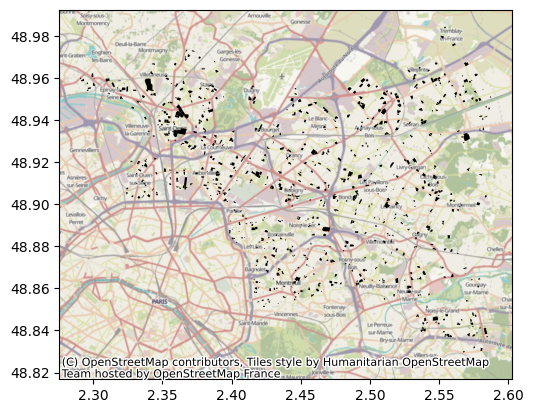

In [8]:
# Takes 10s on my laptop
bdedu = gpd.read_file(GPKG, layer="zone_d_activite_ou_d_interet")# toponymie_services_et_activites
print(len(bdedu),"items")
# Utilisons les memes projections
bdedu = bdedu.to_crs(4326) 
# Tri sur la catégorie d'intéret
bdedu = bdedu[bdedu["categorie"] == "Science et enseignement"] 
bdedu = gpd.sjoin(bdedu, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(bdedu),"items dans la zone")

fig, ax = plt.subplots()
bdedu.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
cx.add_basemap(ax, crs=dpts.crs)
fig.show()


In [9]:
bat_edu = gpd.sjoin(gpd.GeoDataFrame(bats[["cleabs","geometry","identifiants_rnb","materiaux_de_la_toiture","hauteur"]],geometry="geometry"), gpd.GeoDataFrame(bdedu[["cleabs","toponyme","geometry"]],geometry="geometry"), how='left').dropna(subset="toponyme")
bat_edu.head(3)

cleabs_left  \
1699  BATIMENT0000000002599800   
1771  BATIMENT0000000002600955   
1772  BATIMENT0000000002600963   

                                               geometry  \
1699  MULTIPOLYGON Z (((2.55395 48.98409 82.5, 2.553...   
1771  MULTIPOLYGON Z (((2.37721 48.96971 54, 2.3772 ...   
1772  MULTIPOLYGON Z (((2.37721 48.96971 54, 2.37734...   

               identifiants_rnb materiaux_de_la_toiture  hauteur  index_right  \
1699  A12MR4AER8XA/H3V9FEZVTCQH                    None      7.9       8101.0   
1771               GMKNQX3Q3AY4                    None     11.4       9799.0   
1772               FWK5CQ31Y968                             11.3       9799.0   

                  cleabs_right                         toponyme  
1699  SURFACTI0000000002555409  I.M.E. B. Guillez le Petit Orme  
1771  SURFACTI0000000002555414    Groupe Scolaire Paul Langevin  
1772  SURFACTI0000000002555414    Groupe Scolaire Paul Langevin

On peut aussi afficher les réseaux

/Users/chmadran/Library/Caches/pypoetry/virtualenvs/potentiel-solaire-VqVdMU7S-py3.13/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying' not supported
  return ogr_read(
/Users/chmadran/Library/Caches/pypoetry/virtualenvs/potentiel-solaire-VqVdMU7S-py3.13/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying(256)' not supported
  return ogr_read(
/Users/chmadran/Library/Caches/pypoetry/virtualenvs/potentiel-solaire-VqVdMU7S-py3.13/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying(30)' not supported
  return ogr_read(
/Users/chmadran/Library/Caches/pypoetry/virtualenvs/potentiel-solaire-VqVdMU7S-py3.13/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'timestamp with time zone' not supported
  return ogr_read(
/Users/chmadran/Library/Caches/pypoetry/virtualenvs/potentiel-solaire-VqVdMU7S-py3.13/lib/python3.13/site-packages/p

188015 items
68497 items


/var/folders/k7/bzt5hyld3w52dgp85hycld2h0000gn/T/ipykernel_14861/1883887287.py:9: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdtopo.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
/var/folders/k7/bzt5hyld3w52dgp85hycld2h0000gn/T/ipykernel_14861/1883887287.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


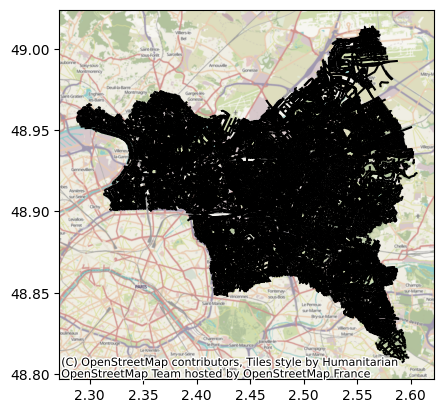

In [10]:
# Takes 80s on my laptop -- loading roads in this case
bdtopo = gpd.read_file(GPKG)
print(len(bdtopo),"items")
# Utilisons les memes projections
bdtopo = bdtopo.to_crs(4326)
bdtopo = gpd.sjoin(bdtopo, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(bdtopo),"items")
fig, ax = plt.subplots()
bdtopo.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
cx.add_basemap(ax, crs=dpts.crs)
fig.show()

## Dataset: parcellaire-express

In [11]:
# Takes 11s on my laptop
pci = gpd.read_file(DATA_FOLDER / "PARCELLAIRE-EXPRESS_1-1__SHP_LAMB93_D093_2024-10-01/PARCELLAIRE-EXPRESS/1_DONNEES_LIVRAISON_2024-11-00210/PEPCI_1-1_SHP_LAMB93_D093/BATIMENT.SHP")
print(len(pci),"items")
pci = pci.to_crs(4326)
pci = gpd.sjoin(pci, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(pci),"items - sorted")
pci.head(3)

376574 items
376220 items - sorted


TYPE                                           geometry  \
0  Construction légère  POLYGON ((2.39066 48.90535, 2.3907 48.90536, 2...   
1      Bâtiment en dur  POLYGON ((2.52665 48.87779, 2.52669 48.87777, ...   
2      Bâtiment en dur  POLYGON ((2.52583 48.87706, 2.52582 48.87706, ...   

   index_right code                nom  
0         93.0   93  Seine-Saint-Denis  
1         93.0   93  Seine-Saint-Denis  
2         93.0   93  Seine-Saint-Denis

# Etape 2: Exploration autour d'une école

## Etablissement d'une zone d'intérêt

In [12]:
pd.DataFrame(annuaire.iloc[0])

2524
identifiant_de_l_etablissement                                       0930863H
nom_etablissement                   Maison d'éducation de la Légion d'Honneur
type_etablissement                                                      Lycée
statut_public_prive                                                    Public
adresse_1                                        5 rue de la Légion d'Honneur
...                                                                       ...
code_zone_animation_pedagogique                                          None
libelle_zone_animation_pedagogique                                       None
code_bassin_formation                                                   24931
libelle_bassin_formation                           93 BASSIN 1 (DIST. 1 ET 2)
geometry                              POINT (2.358461148112 48.9349548892498)

[73 rows x 1 columns]

In [13]:
# Filtrons autour de d = 100m
d = 0.02 # échelle à retrouver
zone = annuaire.iloc[0].geometry.buffer(d)

## Clip des dataset pour rester léger

In [14]:
bdtopo_d = bdtopo[bdtopo.geometry.within(zone)].clip(zone)# check with within
pci_d = pci[pci.geometry.within(zone)].clip(zone)# check with within
bdedu_d = bdedu[bdedu.geometry.within(zone)].clip(zone)# check with within
bat_edu_d =  bat_edu[bat_edu.geometry.within(zone)].clip(zone)

/var/folders/k7/bzt5hyld3w52dgp85hycld2h0000gn/T/ipykernel_14861/3993707997.py:6: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdedu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
/var/folders/k7/bzt5hyld3w52dgp85hycld2h0000gn/T/ipykernel_14861/3993707997.py:7: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bat_edu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="yellow")


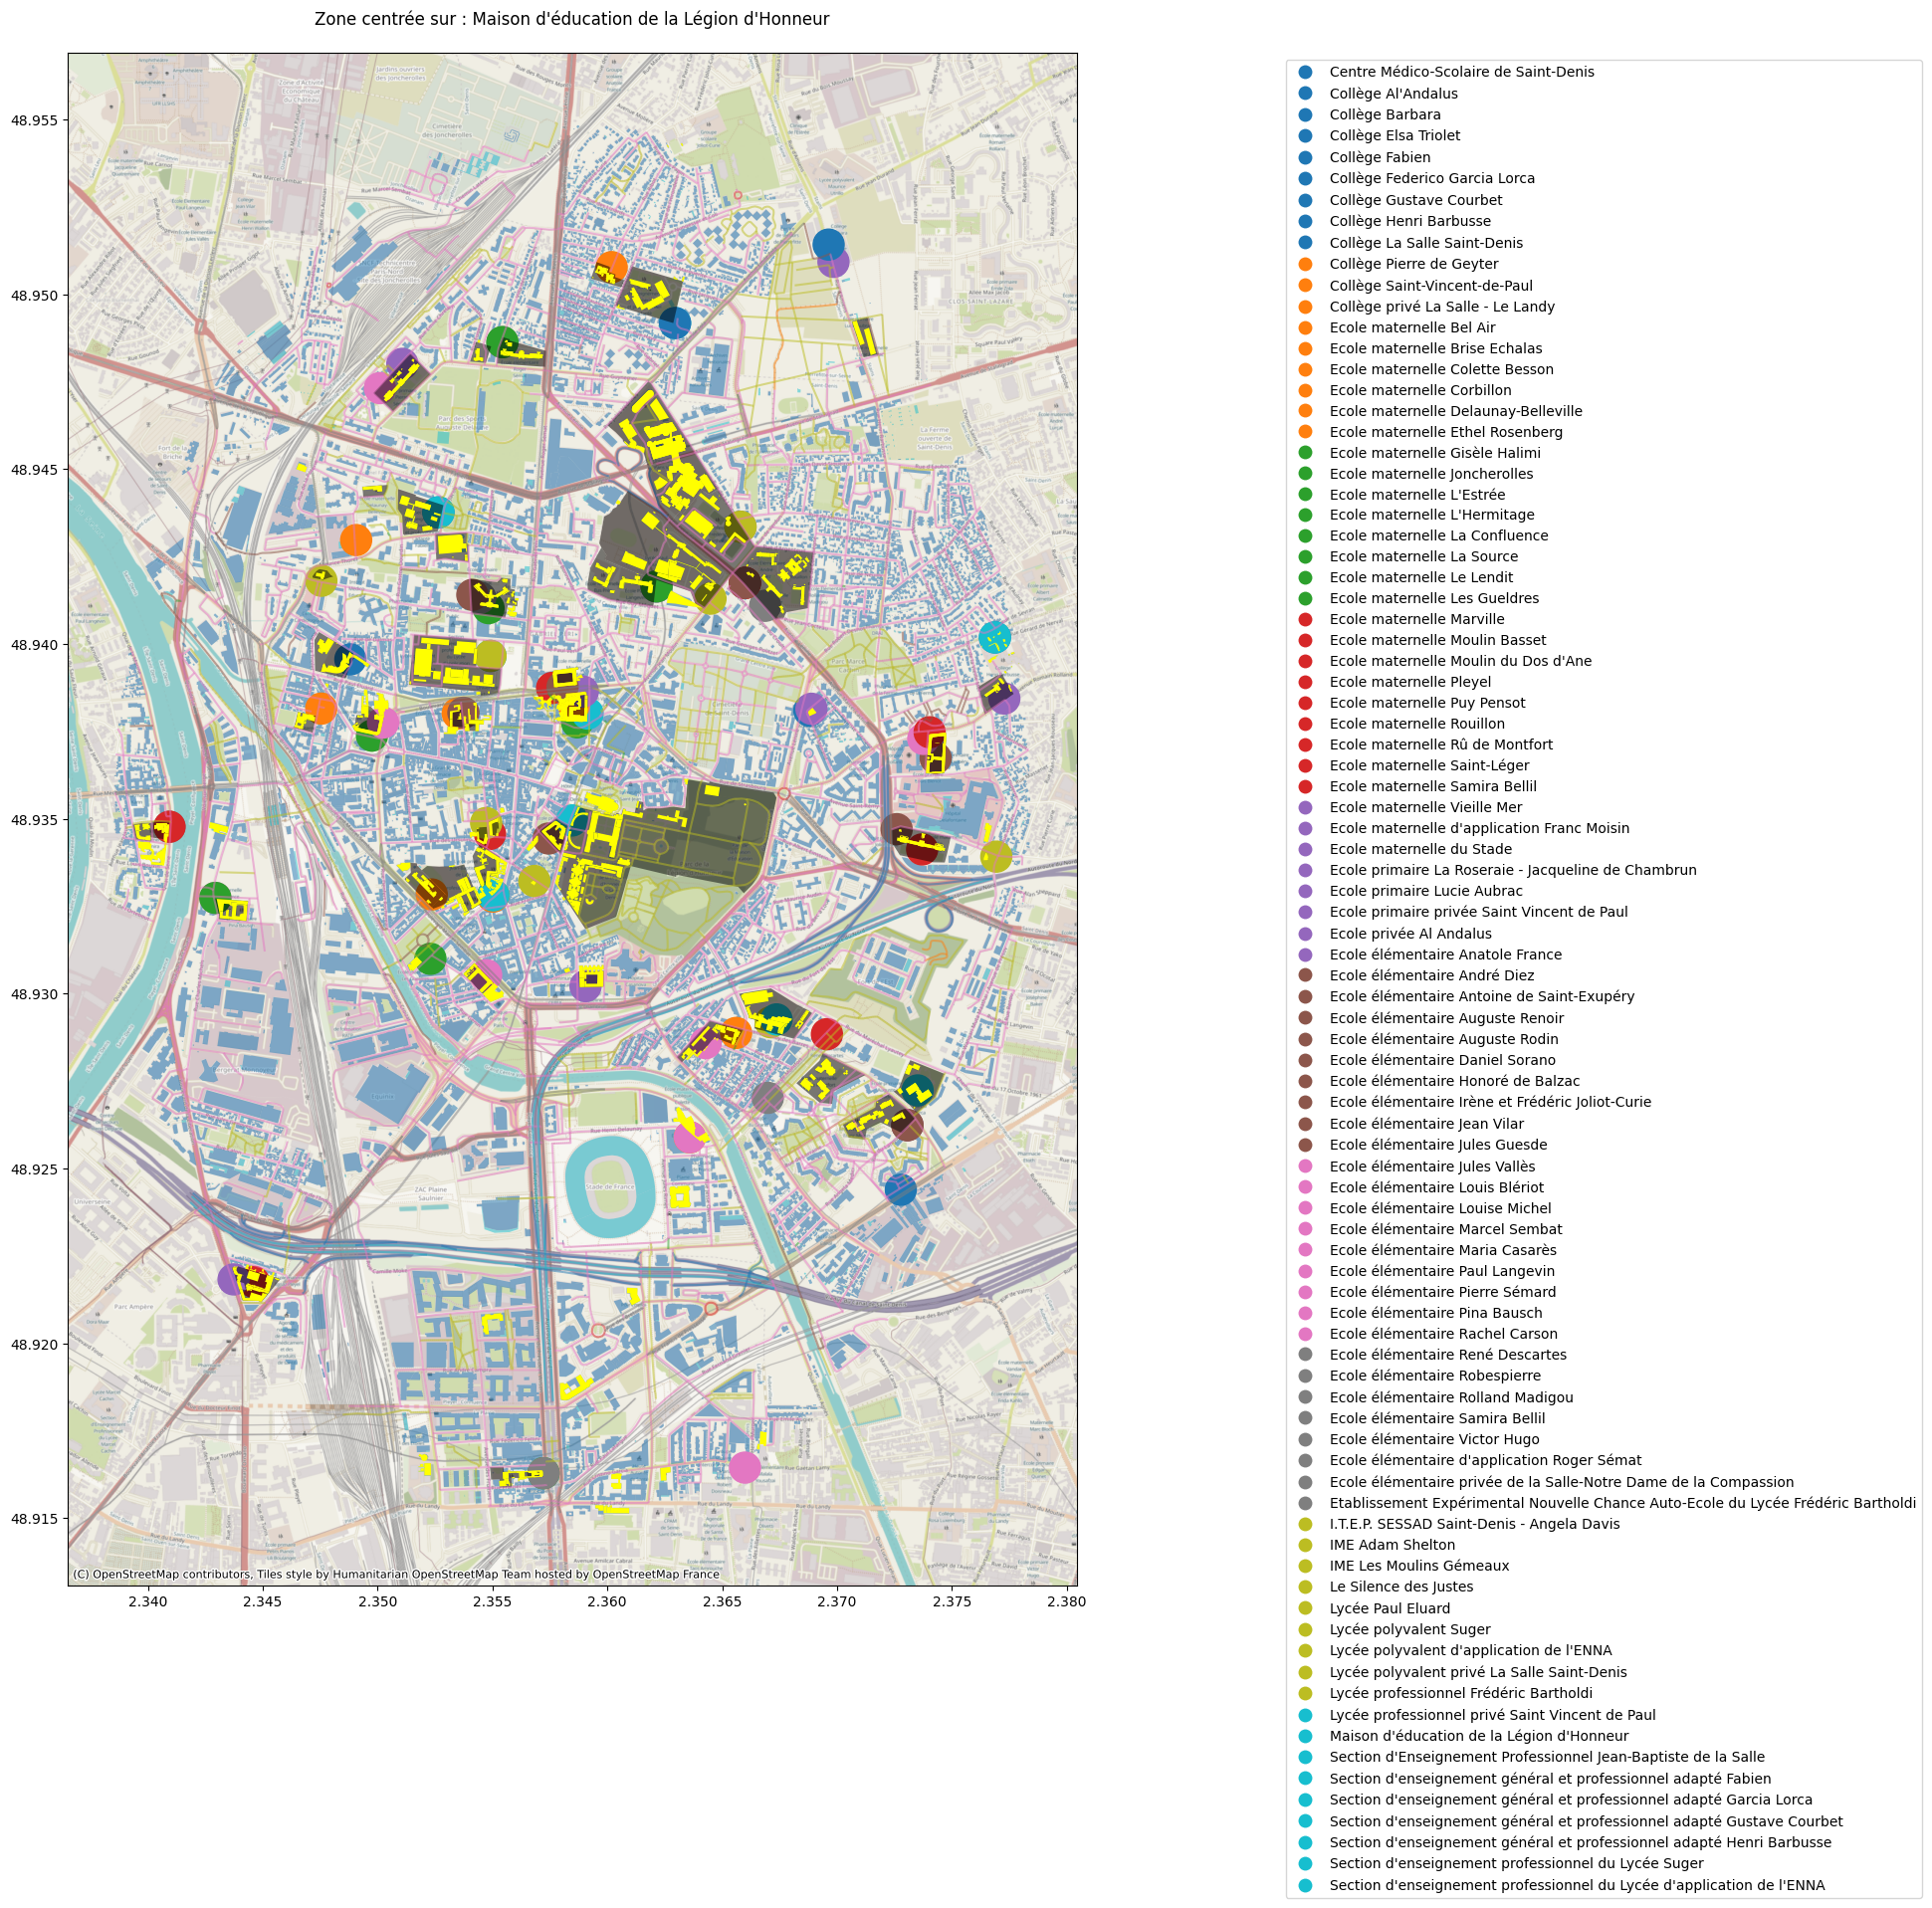

<Figure size 640x480 with 0 Axes>

In [15]:
#plots all dans la zone sélectionnée
fig, ax = plt.subplots(figsize=(20,20))
pci_d.plot(column="TYPE", legend=True, categorical = True, ax = ax, alpha=0.5)
bdtopo_d.plot(column="nature",legend=True, categorical = True, ax = ax, alpha=0.5)
annuaire[annuaire.geometry.within(zone)].clip(zone).plot(column = "nom_etablissement",legend=True, categorical = True, ax = ax, markersize=500, legend_kwds={'loc': 'upper left'})
bdedu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
bat_edu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="yellow")
cx.add_basemap(ax, crs=pci_d.crs, zoom=16) # source=cx.providers.OpenStreetMap.Mapnik,
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.2, 0, 0, 1))
ax.set_title("Zone centrée sur : "+annuaire.iloc[0].nom_etablissement+"\n")
plt.show()
plt.savefig("preview_example.jpg")

# Etape 3: Travail au niveau d'une école spécifique

In [16]:
from shapely.ops import nearest_points

## Sélection de l'école et clip des datasets

In [17]:
# On s'intéresse à : bdedu_d, bat_edu_d
ecoles = annuaire[annuaire.geometry.within(zone)]
ecoles.head(3)

identifiant_de_l_etablissement  \
2524                        0930863H   
17142                       0930273S   
17155                       0930438W   

                               nom_etablissement type_etablissement  \
2524   Maison d'éducation de la Légion d'Honneur              Lycée   
17142         Ecole élémentaire Honoré de Balzac              Ecole   
17155                   Ecole maternelle Bel Air              Ecole   

      statut_public_prive                     adresse_1 adresse_2  \
2524               Public  5 rue de la Légion d'Honneur      None   
17142              Public            10 rue Jean Mermoz      None   
17155              Public       8 rue le Roy des Barrès      None   

            adresse_3 code_postal code_commune  nom_commune  ...  \
2524             None       93206        93066  Saint-Denis  ...   
17142  93200 ST DENIS       93200        93066  Saint-Denis  ...   
17155  93200 ST DENIS       93200        93066  Saint-Denis  ...   

      code_type_contrat_prive      pial etablissement_mere  \
2524                       99      None               None   
17142                      99  0930587H               None   
17155                      99      None               None   

       type_rattachement_etablissement_mere  code_circonscription  \
2524                                   None                  None   
17142                                  None              0932609F   
17155                                  None              0932058G   

      code_zone_animation_pedagogique libelle_zone_animation_pedagogique  \
2524                             None                               None   
17142                            None                               None   
17155                            None                               None   

      code_bassin_formation    libelle_bassin_formation  \
2524                  24931  93 BASSIN 1 (DIST. 1 ET 2)   
17142                  None                        None   
17155                  None                        None   

                       geometry  
2524   POINT (2.35846 48.93495)  
17142  POINT (2.35412 48.94141)  
17155   POINT (2.3656 48.92888)  

[3 rows x 73 columns]

In [18]:
recollement = gpd.sjoin_nearest(ecoles, bdedu_d, distance_col="distances", lsuffix="e_", rsuffix="f_", exclusive=True)[["identifiant_de_l_etablissement","nom_etablissement","distances","toponyme","cleabs","nature","nature_detaillee"]]
recollement.head(3)

/Users/chmadran/Library/Caches/pypoetry/virtualenvs/potentiel-solaire-VqVdMU7S-py3.13/lib/python3.13/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


identifiant_de_l_etablissement  \
2524                        0930863H   
17142                       0930273S   
17155                       0930438W   

                               nom_etablissement     distances  \
2524   Maison d'éducation de la Légion d'Honneur  9.086223e-07   
17142         Ecole élémentaire Honoré de Balzac  0.000000e+00   
17155                   Ecole maternelle Bel Air  0.000000e+00   

                                        toponyme                    cleabs  \
2524   Maison d'Éducation de la Légion d'Honneur  SURFACTI0000000002555651   
17142              École Élémentaire Victor Hugo  SURFACTI0000000002555608   
17155            École Élémentaire Louise Michel  SURFACTI0000000002555707   

                      nature   nature_detaillee  
2524                   Lycée               None  
17142  Enseignement primaire  Ecole élémentaire  
17155  Enseignement primaire  Ecole élémentaire

Et on essaye de bien vérifier que les écoles identifiées soient celles des zones identifiées, pour ca on vérifie la distance entre les écoles et les zones

Et on retire les matchs où la distance entre les deux points est trop grande

5.619002330454605e-05


<Axes: >

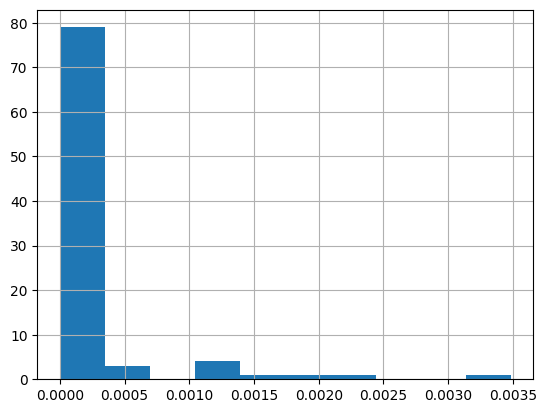

In [19]:
seuil_recol = recollement.distances.quantile(q=0.7)
print(seuil_recol)
recollement.distances.hist()

In [20]:
recollement = recollement[recollement.distances < seuil_recol]
bdedu_areas = recollement.toponyme.unique()
bdedu_r = bdedu[bdedu.toponyme.isin(bdedu_areas)]
recollement.head(3)

identifiant_de_l_etablissement  \
2524                        0930863H   
17142                       0930273S   
17155                       0930438W   

                               nom_etablissement     distances  \
2524   Maison d'éducation de la Légion d'Honneur  9.086223e-07   
17142         Ecole élémentaire Honoré de Balzac  0.000000e+00   
17155                   Ecole maternelle Bel Air  0.000000e+00   

                                        toponyme                    cleabs  \
2524   Maison d'Éducation de la Légion d'Honneur  SURFACTI0000000002555651   
17142              École Élémentaire Victor Hugo  SURFACTI0000000002555608   
17155            École Élémentaire Louise Michel  SURFACTI0000000002555707   

                      nature   nature_detaillee  
2524                   Lycée               None  
17142  Enseignement primaire  Ecole élémentaire  
17155  Enseignement primaire  Ecole élémentaire

## Création d'une liste école par école au sein de la zone définie à l'étape 2

/var/folders/k7/bzt5hyld3w52dgp85hycld2h0000gn/T/ipykernel_14861/564879362.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bat_edu_s['hauteur'].fillna((bat_edu_s['hauteur'].mean()+0.001), inplace=True)


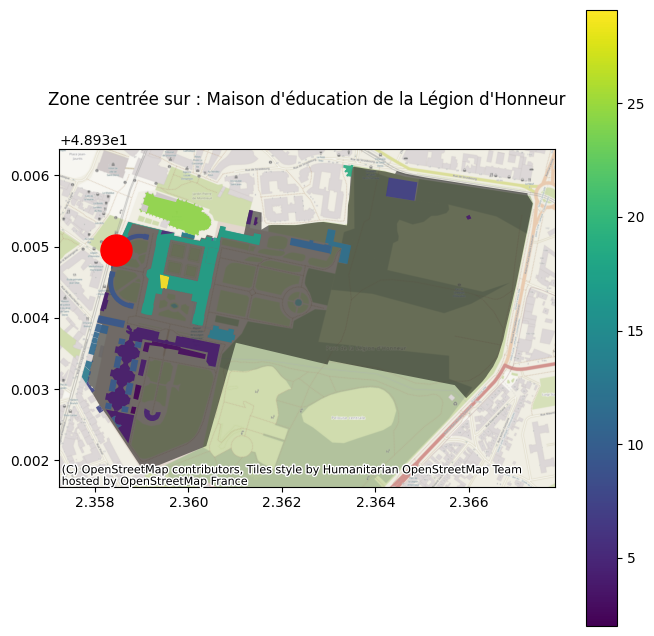

In [21]:
documentation = "# Example de liste d'écoles\n\n"

fullRun = False # Set true to to all all schools
if fullRun :
    ecoles_to_run = recollement["identifiant_de_l_etablissement"].unique()
else:
    ecoles_to_run = [recollement["identifiant_de_l_etablissement"].unique()[0]]
for id_ecole in ecoles_to_run:

    ecole = ecoles[ecoles.identifiant_de_l_etablissement == id_ecole]
    documentation +="## "+ecole.iloc[0]["nom_etablissement"]+"\n\n" + \
        "* Type etablissement: "+ecole.iloc[0]["type_etablissement"] +"\n"+ \
        "* adresse_1: "+ecole.iloc[0]["adresse_1"] +"\n"+ \
        "* nom_commune: "+ecole.iloc[0]["nom_commune"] +"\n"+ \
        "* identifiant_de_l_etablissement: "+ecole.iloc[0]["identifiant_de_l_etablissement"] +"\n"
    match = recollement[recollement.identifiant_de_l_etablissement == id_ecole]
    zone = ecole.iloc[0].geometry.buffer(0.01)
    bdedu_s = bdedu[bdedu.toponyme == match.iloc[0].toponyme ].clip(zone)
    bat_edu_s = bat_edu[bat_edu.toponyme == match.iloc[0].toponyme ].clip(zone)
    bat_edu_s['hauteur'].fillna((bat_edu_s['hauteur'].mean()+0.001), inplace=True)
    geod = bat_edu_s.crs.get_geod()
    bat_edu_s["area_m2"] = bat_edu_s.geometry.apply(lambda g: abs(geod.geometry_area_perimeter(g)[0]))
    documentation += "* Surface totale: "+str(int(bat_edu_s.area_m2.sum())) +"m2\n\n"
    if os.path.isfile("images/"+id_ecole+".jpg"):
        pass
    else:
        fig, ax = plt.subplots(figsize=(8,8))
        bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
        bat_edu_s.plot(column="hauteur",legend=True, ax = ax, alpha=0.9)
        ecole.plot(color="red", ax = ax, markersize=500)
        cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
        ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\n")
        plt.savefig("images/"+id_ecole+".jpg")

    documentation += "### Image\n\n![]("+ecole.iloc[0]["identifiant_de_l_etablissement"]+".jpg)\n\n"
if not fullRun:
    fig, ax = plt.subplots(figsize=(8,8))
    bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
    bat_edu_s.plot(column="hauteur",legend=True, ax = ax, alpha=0.9)
    ecole.plot(color="red", ax = ax, markersize=500)
    cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
    ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\n")
else:
    with open("images/Readme.md", "w") as f:
        f.write(documentation)

# Etape 3: Intégration pour le d93 une source de donnée 'potentiel solaire"

* Provenance: https://data-iau-idf.opendata.arcgis.com/datasets/iau-idf::le-potentiel-solaire-des-toitures/

##  Préparation de la requete


On définit le périmètre de la zone d'intérêt avant d'aller demander les data

In [47]:
dfecole = pd.concat([bdedu_s,bat_edu_s,ecole])
gdf = gpd.GeoDataFrame(dfecole,geometry="geometry")
geo = ",".join([str(x) for x in gdf.total_bounds])
geo


'2.4853980733826986,48.87981160695636,2.4885570162361557,48.88097363204391'

On prend les données des batiments qui sont dans la box

In [46]:
import requests

requete_type = "https://geoweb.iau-idf.fr/agsmap1/rest/services/OPENDATA/OpendataIAU4/MapServer/26/query?where=1%3D1&outFields=*&geometry="+geo+"&geometryType=esriGeometryEnvelope&inSR=4326&spatialRel=esriSpatialRelIntersects&outSR=4326&f=json"

response = requests.get(requete_type) 


In [67]:
potentiel_batiment = pd.DataFrame([x["attributes"] for x in response.json()["features"]])
potentiel_batiment = potentiel_batiment[potentiel_batiment.id.isin(bat_edu_s.cleabs_left)]
bat_edu_p = bat_edu_s.merge(potentiel_batiment,how="left", left_on="cleabs_left", right_on="id")
bat_edu_p.head(3)

cleabs_left  \
0  BATIMENT0000000313027262   
1  BATIMENT0000000313027260   
2  BATIMENT0000000313027263   

                                            geometry identifiants_rnb  \
0  POLYGON Z ((2.48585 48.87989 -1000, 2.48583 48...             None   
1  POLYGON Z ((2.48587 48.88037 71.1, 2.48603 48....     Y8GPADQZH2DC   
2  POLYGON Z ((2.48604 48.88042 73.7, 2.48603 48....     T2BATBV2GF9E   

  materiaux_de_la_toiture  hauteur  index_right              cleabs_right  \
0                    None    7.821      10264.0  SURFACTI0000000002555986   
1                    None    5.000      10264.0  SURFACTI0000000002555986   
2                    None    7.700      10264.0  SURFACTI0000000002555986   

                         toponyme     area_m2  objectid  ...  \
0  École Maternelle les Marnaudes    4.690845  487299.0  ...   
1  École Maternelle les Marnaudes  785.396726  462578.0  ...   
2  École Maternelle les Marnaudes  943.029946  410712.0  ...   

                       systeme protection  mos2017    insee     moyenne2  \
0                Non favorable        0.0     58.0  93064.0          NaN   
1  thermique ou photovoltaïque        0.0     58.0  93064.0  1163.837235   
2  thermique ou photovoltaïque        0.0     58.0  93064.0  1196.987103   

  forme    production mos17  st_area(shape)  st_length(shape)  
0  plat      0.000000  10.0           4.690          9.387851  
1  plat  61084.136939  10.0         785.255        146.565731  
2  plat  30675.786982  10.0         509.500        144.429145  

[3 rows x 27 columns]

## Visualisation

Text(0.5, 1.0, "Zone centrée sur : Ecole élémentaire Jean Mermoz\nColormap: champ 'production' de la BDD:\n'Potentiel solaire des toitures' de data-iau-idf\n(Unité à confirmer, kWh/an ?)")

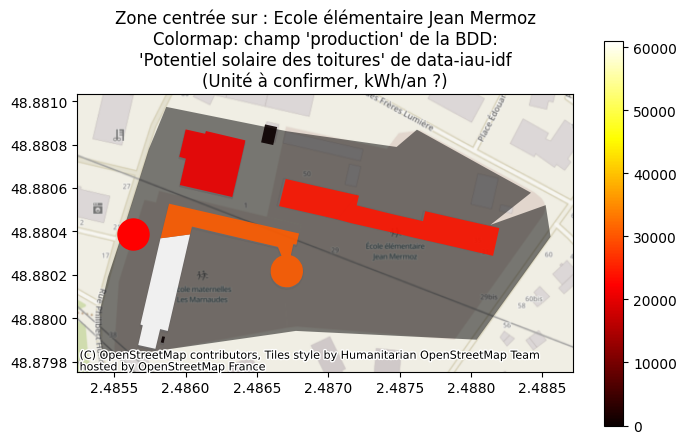

In [75]:
fig, ax = plt.subplots(figsize=(8,5))
bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
bat_edu_p.plot(column="production",legend=True, ax = ax, alpha=0.9,cmap="hot")
ecole.plot(color="red", ax = ax, markersize=500)
cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\nColormap: champ 'production' de la BDD:\n'Potentiel solaire des toitures' de data-iau-idf\n(Unité à confirmer, kWh/an ?)")

## Etape 4 : Ouverture de la db Gisement Solaire Brut au Bati 

In [39]:
# Takes some time 

potentiel_solaire = gpd.read_file(DATA_FOLDER / "potentiel-gisement-solaire-brut-au-bati.geojson").to_crs(4326)

In [23]:
potentiel_solaire.columns

Index(['geo_point_2d', 'geo_shape', 'objectid', 'n_sq_eb', 'n_sq_eb_or',
       'c_cainsee', 'm2_e_in700', 'm2_e_70_80', 'm2_e_80_90', 'm2_e_90_10',
       'm2_e_s1000', 'm2_e_tot', 'c_ens_moy', 'shape_leng', 'shape_area',
       'geometry'],
      dtype='object')

Number of buildings with missing solar data:
5


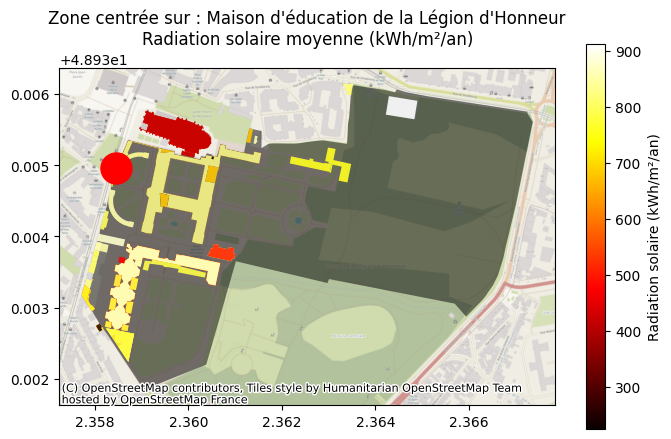

In [37]:
# Reset indices and ensure CRS match
bat_edu_s = bat_edu_s.reset_index(drop=True)
potentiel_solaire = potentiel_solaire.reset_index(drop=True)
bat_edu_s = bat_edu_s.to_crs(potentiel_solaire.crs)

# Perform spatial join with explicit suffixes
school_solar = gpd.sjoin(
    bat_edu_s, 
    potentiel_solaire, 
    how="left", 
    predicate="intersects",
    lsuffix='_left',
    rsuffix='_right'
)

print("Number of buildings with missing solar data:")
print(school_solar['c_ens_moy'].isna().sum())

fig, ax = plt.subplots(figsize=(8,5))
bdedu_s.plot(legend=True, categorical=True, ax=ax, color="black", alpha=0.5)

school_solar.plot(
    column="c_ens_moy",  # average solar radiation
    legend=True, 
    ax=ax, 
    alpha=0.9,
    cmap="hot",
    legend_kwds={'label': 'Radiation solaire (kWh/m²/an)'}
)

ecole.plot(color="red", ax=ax, markersize=500)
cx.add_basemap(ax, crs=pci_d.crs, zoom=18)
ax.set_title("Zone centrée sur : " + ecole.iloc[0].nom_etablissement + 
             "\nRadiation solaire moyenne (kWh/m²/an)")

plt.show()

## Impression des autres métriques de la db potentiel solaire 2

Liste des attributs : https://geocatalogue.apur.org/catalogue/srv/fre/catalog.search#/metadata/urn:apur:potentiel_gisement_solaire_brut_au_bati

In [42]:
# Get the specific school's data
school_data = school_solar.iloc[0]

print("Solar Potential Analysis for:", ecole.iloc[0].nom_etablissement)
print("-" * 50)

# Building information
print("\nBuilding Surface Areas:")
print(f"Total roof surface: {school_data['m2_e_tot']:.0f} m²")
print("\nBreakdown by solar radiation level:")
print(f"- Excellent (>1000 kWh/m²/year): {school_data['m2_e_s1000']:.0f} m²")
print(f"- Very Good (900-1000 kWh/m²/year): {school_data['m2_e_90_10']:.0f} m²")
print(f"- Good (800-900 kWh/m²/year): {school_data['m2_e_80_90']:.0f} m²")
print(f"- Moderate (700-800 kWh/m²/year): {school_data['m2_e_70_80']:.0f} m²")
print(f"- Limited (<700 kWh/m²/year): {school_data['m2_e_in700']:.0f} m²")

print("\nAverage Solar Radiation:")
print(f"Mean radiation: {school_data['c_ens_moy']:.0f} kWh/m²/year")

# Additional geometric information
print("\nGeometric Information:")
print(f"Building perimeter: {school_data['shape_leng']:.0f} meters")
print(f"Building footprint area: {school_data['shape_area']:.0f} m²")

# Location information
print("\nLocation Information:")
print(f"Municipality code: {school_data['c_cainsee']:.0f}")
print(f"Building ID: {school_data['n_sq_eb']:.0f}")
print(f"Original Building ID: {school_data['n_sq_eb_or']:.0f}")

# Calculate some additional metrics
if school_data['m2_e_tot'] > 0:
    optimal_percentage = (school_data['m2_e_s1000'] / school_data['m2_e_tot']) * 100
    print("\nDerived Metrics:")
    print(f"Percentage of optimal solar surface: {optimal_percentage:.1f}%")

Solar Potential Analysis for: Maison d'éducation de la Légion d'Honneur
--------------------------------------------------

Building Surface Areas:
Total roof surface: 58 m²

Breakdown by solar radiation level:
- Excellent (>1000 kWh/m²/year): 5 m²
- Very Good (900-1000 kWh/m²/year): 32 m²
- Good (800-900 kWh/m²/year): 9 m²
- Moderate (700-800 kWh/m²/year): 2 m²
- Limited (<700 kWh/m²/year): 10 m²

Average Solar Radiation:
Mean radiation: 864 kWh/m²/year

Geometric Information:
Building perimeter: 31 meters
Building footprint area: 58 m²

Location Information:
Municipality code: 93066
Building ID: 930306954
Original Building ID: 930306954

Derived Metrics:
Percentage of optimal solar surface: 8.6%
